In [131]:
import glob
import pdftotext
from datetime import datetime
import spacy
import re
import nltk
import sys
from tqdm import tqdm 
from time import sleep 
import textacy
import matplotlib.pyplot as plt
from collections import Counter
import re
import csv
import networkx as nx

sys.path.append("/media/gabriel/Data/Projects/cev/noun-phrases/")
from src.util.common import Common

In [2]:
path = "/media/gabriel/Data/temp/scraping-master/sentencias_JyP/ext_data/output/sentencias/"

In [3]:

list_files = glob.glob(path+"*.pdf")
print(list_files[1:2])


['/media/gabriel/Data/temp/scraping-master/sentencias_JyP/ext_data/output/sentencias/Aramis Machado Ortiz_29-jun-11.pdf']


In [4]:
import calendar
print(list(calendar.month_abbr))
# Doc1 305 - 1810

['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [5]:
# Load 
count = 0 
list_texts_corpus = []
for i in tqdm(range(68, len(list_files)), desc ="Read Corpus"):  
    single_file = list_files[i]
    error_flag = False
    count += 1
    name = single_file.replace(path, '').split("_")
    date_time_str = name[1].replace('.pdf', '').replace('dic', 'dec').replace('agt','aug').replace('abr', 'apr').replace('ago', 'aug').replace('ene', 'jan').replace('2014', '14')
    try:
        date_time_obj = datetime.strptime(date_time_str, '%d-%b-%y')
    except:
        error_flag = True
        print(single_file)
        print("Error casting data.")
 
    file_name = name[0].replace(path, '')
    file_name = file_name.replace(date_time_str, '')
    file_name = file_name.replace('.pdf', '')
    
    with open(single_file, "rb") as f:
            pdf = pdftotext.PDF(f)
    if count % 2 == 0:
        break
    sigle_dict = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
                  'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
#     print('\t -> ', count, date_time_str, 'file_name', sigle_dict['file_name'], 'date', sigle_dict['date'], 'num_pages', sigle_dict['num_pages'])
    list_texts_corpus.append(sigle_dict)

Read Corpus:   9%|▉         | 1/11 [00:11<01:52, 11.30s/it]


In [9]:
count = 0
for item in list_texts_corpus:
    count += 1
    print('-> ', count, '\tfile_name:', item['file_name'][:50].zfill(50).replace('0', ' '), '\tdate:', item['date'], '\tnum_pages:', item['num_pages'])

->  1 	file_name:                          Salvatore Mancuso y otros 	date: 2014-11-20 00:00:00 	num_pages: 2261


In [10]:
name_global_model_spacy = "es_core_news_sm"
nlp = spacy.load(name_global_model_spacy)
pattern = r'(<VERB>?<ADV>*<VERB>+)'
verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]

In [11]:
text_page = list_texts_corpus[0]['pages_raw'][1]
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break

                                                   Radicado   : 11 001 22 52 000 2014 00027
                                                   Postulados : Salvatore Mancuso Gómez
                                                                Edgar Ignacio Fierro Flores
                                                                Jorge Iván Laverde Zapata
                                                                Uber Enrique Banquéz Martínez
                                                                José Gregorio Mangones Lugo
                                                                José Bernardo Lozada Ortiz
                                                                Leonardo Enrique Sánchez Barbosa
                                                                Sergio Manuel Córdoba Ávila
                                                                Miguel Ramón Posada Castillo
                                                                Julio Manuel Ar

In [12]:
text_page = re.sub('\s+',' ', list_texts_corpus[0]['pages_raw'][1])
print(text_page)
count = 0
doc = nlp(text_page)
# print(doc.text)
# for token in doc:
#     print(token.text, token.pos_, token.dep_)
for np in doc.noun_chunks:
    count += 1 
    print('\t', count, 'chunk', np.text)
    if count == 20:
        break


 Radicado : 11 001 22 52 000 2014 00027 Postulados : Salvatore Mancuso Gómez Edgar Ignacio Fierro Flores Jorge Iván Laverde Zapata Uber Enrique Banquéz Martínez José Gregorio Mangones Lugo José Bernardo Lozada Ortiz Leonardo Enrique Sánchez Barbosa Sergio Manuel Córdoba Ávila Miguel Ramón Posada Castillo Julio Manuel Argumedo García Oscar José Ospino Pacheco Hernando de Jesús Fontalvo Sánchez Delitos : Contra el DIDDH, el DIH y Conexos Decisión : Sentencia. A. La Desmovilización del Grupo Armado Ilegal B. Bloque Catatumbo C. Bloque Córdoba D. Bloque Heroes De Los Montes de María E. Bloque Norte V. EL JUICIO A. Audiencia Concentrada VI. DEL CONTEXTO EN EL QUE FUERON PERPETRADOS LOS CARGOS FORMULADOS A. El Paramilitarismo B. Autodefensa Unidas de Colombia C. Grupos de Autodefensas y Convivir D. Grupos de Autodefensas y Fuerza Pública VII. GEOREFERENCIACION Y CARACTERIZACION DE LOS BLOQUES. A. Bloque Catatumbo. B. Bloque Norte. C. Bloque Heroes De Los Montes de María. D. Bloque Córdoba. V

In [13]:
print('part 1')
text_page1 = list_texts_corpus[0]['text_raw']
# print(text_page1)
sents = nltk.sent_tokenize(text_page1)
print('# sents:',len(sents), "sample: ", sents[1:4])
print('='*150)
print('part 2')
text_page2 = list_texts_corpus[0]['text_raw']
text_page2 = re.sub('\n+',' ', text_page2)
text_page2 = re.sub('\s+',' ', text_page2)
# print(text_page2)
sents2 = nltk.sent_tokenize(text_page2)
print('# sents:',len(sents), "sample: ", sents2[1:4])


part 1
# sents: 35819 sample:  ['REPÚBLICA DE COLOMBIA\n                    TRIBUNAL SUPERIOR DE BOGOTÁ\n                           SALA DE JUSTICIA Y PAZ\n                   Magistrada Ponente: Léster M. González R.\nNoviembre veinte (20) de Dos mil Catorce (2.014)\n                                   ÍNDICE\nI. OBJETO DE LA DECISIÒN\nII.', 'IDENTIDAD DE LOS POSTULADOS Y SITUACIÒN JURIDICA\nIII.', 'CONSIDERACIONES DE LA SALA\nA. Competencia.']
part 2
# sents: 35819 sample:  ['REPÚBLICA DE COLOMBIA TRIBUNAL SUPERIOR DE BOGOTÁ SALA DE JUSTICIA Y PAZ Magistrada Ponente: Léster M. González R. Noviembre veinte (20) de Dos mil Catorce (2.014) ÍNDICE I. OBJETO DE LA DECISIÒN II.', 'IDENTIDAD DE LOS POSTULADOS Y SITUACIÒN JURIDICA III.', 'CONSIDERACIONES DE LA SALA A. Competencia.']


In [14]:
count_sent = 0
for item in sents2[13:25]:
    count_sent += 1
    print('sent # ', count_sent, '-'*150)
    print('\t without process:', item)
    doc = nlp(item)
    for np in doc.noun_chunks:
        count += 1 
        print('\t\t wp false:', count, 'chunk:', np.text)
    #item = re.sub('[\W_]+', ' ', item, flags=re.UNICODE) # [^A-Za-z0-9_] [\W_] [^-/().&' \w]|_
    item = re.sub(r"[^- \w]|_", "", item)    
    print('\t with process:', item)
    doc = nlp(item)
    np_state = True
    for np in doc.noun_chunks:
        np_state = False
        count += 1 
        print('\t\t wp true:', count, 'chunk:', np.text)
    if np_state:
        print('\t\t error: This sentence has no noun phrase.')
    noun_pharses=set()
    noun_pharses_nc=[]    
    for nc in doc.noun_chunks:
        noun_dict = {'nc': nc, 'np': []}
        for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
            noun_dict['np'].append(np)
        # noun_pharses.add(np)
        noun_pharses_nc.append(noun_dict)
    print('\t\t wp nc true:', noun_pharses_nc)
    for entity in doc.ents:
        print('\t\t ent nc true:', entity.text, entity.label_)
    verb_pattern = [{"POS": "VERB", "OP": "*"},{"POS": "ADV", "OP": "*"},{"POS": "VERB", "OP": "+"},{"POS": "PART", "OP": "*"}]
    nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
#     verb_phrases = textacy.extract.pos_regex_matches(nlp_verb_phrases, pattern)
#     # Print all Verb Phrase
#     for chunk in verb_phrases:
#         print('\t\t wp nc true verb_phrases:', chunk.text)
    verb_phrases_2 = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
    for chunk in verb_phrases_2:
        print('\t\t wp nc true verb_phrases 2:', chunk.text)


sent #  1 ------------------------------------------------------------------------------------------------------------------------------------------------------
	 without process: D. Bloque Córdoba.
		 wp false: 21 chunk: D. Bloque Córdoba
	 with process: D Bloque Córdoba
		 wp true: 22 chunk: D Bloque Córdoba
		 wp nc true: [{'nc': D Bloque Córdoba, 'np': [D Bloque Córdoba, D Bloque Córdoba]}]
sent #  2 ------------------------------------------------------------------------------------------------------------------------------------------------------
	 without process: VIII.
		 wp false: 23 chunk: VIII
	 with process: VIII
		 wp true: 24 chunk: VIII
		 wp nc true: [{'nc': VIII, 'np': [VIII, VIII]}]
sent #  3 ------------------------------------------------------------------------------------------------------------------------------------------------------
	 without process: REQUISITOS DE ELEGIBILIDAD A. Bloque Catatumbo B. Bloque Norte C. Bloque Heroes De Los Montes De María 2 Radic

In [15]:

for i in tqdm(range(0, len(list_texts_corpus)), desc ="Structure Corpus"):  
    single_doc = list_texts_corpus[i]   
    count_page = 0
    count_sent = 0
    count_sent_local = 0
    for page_raw in single_doc['pages_raw'][305:1810]:
        count_page += 1
        count_sent_local = 0
        text_raw = page_raw
        text_raw = re.sub('\n+',' ', text_raw)
        text_raw = re.sub('\s+',' ', text_raw)
        sents_raw = nltk.sent_tokenize(text_raw)
        for item in sents_raw:
            dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': [], 'entities': [] }
            count_sent += 1
            count_sent_local += 1
            item = re.sub(r"[^- \w]|_", "", item)
            dict_sent['text_clear'] = item            
#             if count_sent % 100 == 0:
#                 print('sent # ', count_sent, '-'*150)
#                 print('\t with process:', item)
            doc = nlp(item)
            np_state = True
            count_chunk = 0 n,m nbv 
            for np in doc.noun_chunks:
                np_state = False
                count_chunk += 1 
                dict_sent['chunks'].append({'num': count_chunk, 'text': np.text})
            for entity in doc.ents:
                dict_sent['entities'].append({'type': entity.label_, 'text': entity.text})                
            nlp_verb_phrases = textacy.make_spacy_doc(item, lang=name_global_model_spacy)
            verb_phrases = textacy.extract.matches(nlp_verb_phrases, verb_pattern)
            count_chunk = 0
            for vp in verb_phrases:
                count_chunk += 1 
                dict_sent['verbs'].append({'num': count_chunk, 'text': vp.text})                
#                 if count_sent % 100 == 0:
#                     print('\t\t wp true:', count, 'chunk:', np.text)
#             if np_state:
#                 if count_sent % 100 == 0:
#                     print('\t\t error: This sentence has no noun phrase.')                    
            list_texts_corpus[i]['sentences'].append(dict_sent)


Structure Corpus: 100%|██████████| 1/1 [06:25<00:00, 385.77s/it]


In [ ]:
# {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
#                   'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
# {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': [], 'entities': [] }

In [62]:
# 1550 - 2100 PAG 142 -198
# PAgina 305 1810
print(len(list_texts_corpus[0]['sentences']),list_texts_corpus[0]['num_pages'], list_texts_corpus[0]['sentences'][2100]) # 5000

25551 2261 {'page': 124, 'local_sent': 0, 'global_sent': 2100, 'text_raw': ' Radicado : 11 001 22 52 000 2014 00027 Postulados : Salvatore Mancuso Gómez Edgar Ignacio Fierro Flores Jorge Iván Laverde Zapata Uber Enrique Banquéz Martínez José Gregorio Mangones Lugo José Bernardo Lozada Ortiz Leonardo Enrique Sánchez Barbosa Sergio Manuel Córdoba Ávila Miguel Ramón Posada Castillo Julio Manuel Argumedo García Oscar José Ospino Pacheco Hernando de Jesús Fontalvo Sánchez Delitos : Contra el DIDDH, el DIH y Conexos Decisión : Sentencia.', 'text_clear': ' Radicado  11 001 22 52 000 2014 00027 Postulados  Salvatore Mancuso Gómez Edgar Ignacio Fierro Flores Jorge Iván Laverde Zapata Uber Enrique Banquéz Martínez José Gregorio Mangones Lugo José Bernardo Lozada Ortiz Leonardo Enrique Sánchez Barbosa Sergio Manuel Córdoba Ávila Miguel Ramón Posada Castillo Julio Manuel Argumedo García Oscar José Ospino Pacheco Hernando de Jesús Fontalvo Sánchez Delitos  Contra el DIDDH el DIH y Conexos Decisión 

In [36]:
# noun_pharses=set()    
# for nc in doc.noun_chunks:
#     for np in [nc, doc[nc.root.left_edge.i:nc.root.right_edge.i+1]]:
#        noun_pharses.add(np)

Salvatore Mancuso y otros
['Salvatore Mancuso y otros']
label_chunk 66048 13752
label_ent 10885 5063
label_verb 24927 5024


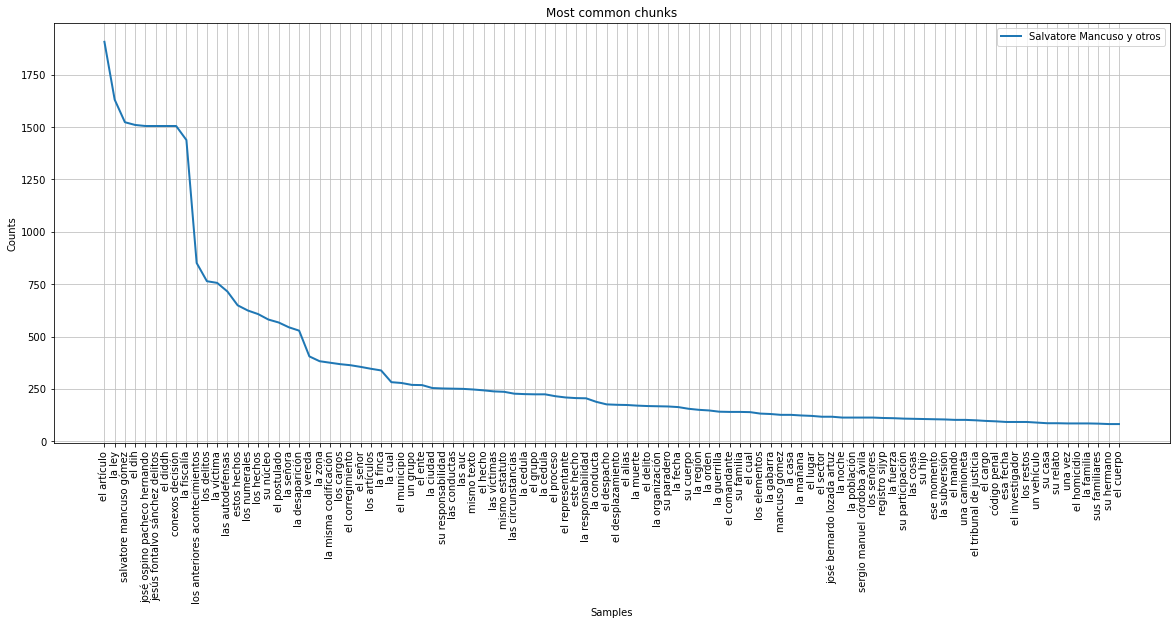

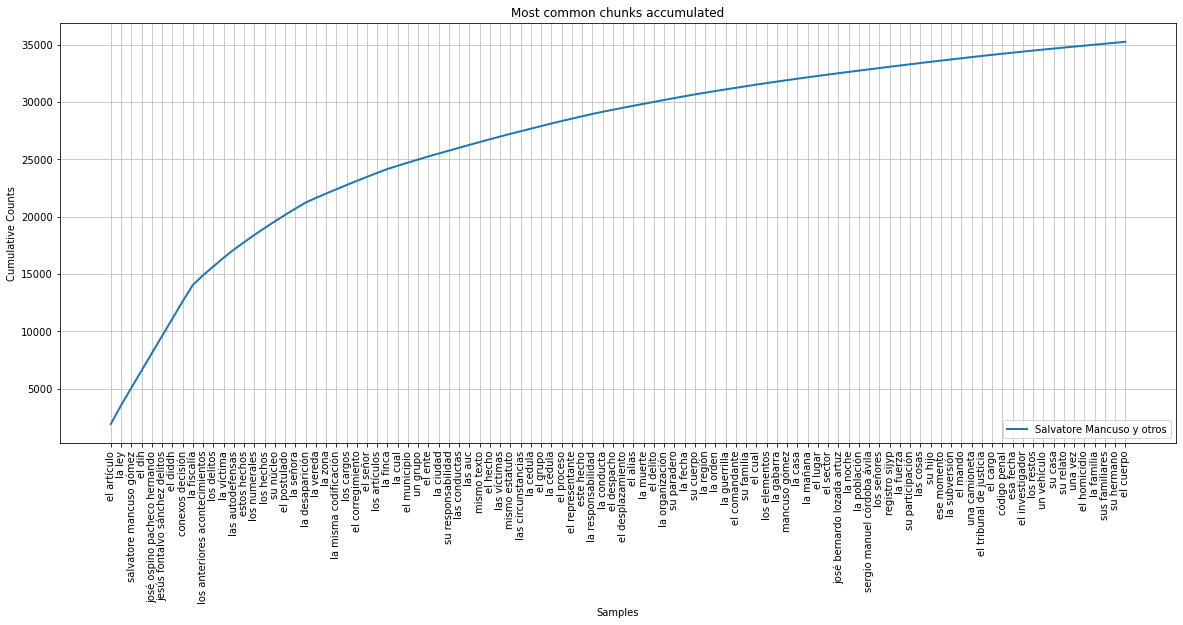

In [127]:
# doc = {'path': single_file, 'file_name': file_name, 'date': date_time_obj, 'year': date_time_obj.year, 'month': date_time_obj.month, 'day': date_time_obj.day, 'num_pages': len(pdf), 'pages_raw': list(pdf),  
#                   'text_raw': "\n\n".join(pdf), 'sentences': [], 'doc_parser': []}
# dict_sent = {'page': count_page, 'local_sent': count_sent_local, 'global_sent': count_sent, 'text_raw': item, 'text_clear': '', 'chunks': [], 'verbs': []}
from collections import Counter

label_sent = []
label_chunk_sent = {}
label_chunk = []
label_ent_sent = {}
label_ent = []
label_verb_sent = {}
label_verb = []
heat_ent_x = []
heat_ent_y = []
heat_verb_x = []
heat_verb_y = []

for item in list_texts_corpus:
    label_sent.append(item['file_name'])
    key_name = item['file_name'] # item['file_name'].lower().strip()
    print(key_name)
    label_chunk_sent[key_name] = [item_chunk['text'].lower() for sent in item['sentences'] for item_chunk in sent['chunks']  if len(item_chunk['text'].split(' ')) > 1 and len(item_chunk['text'].split(' ')) < 5]
    label_chunk += label_chunk_sent[key_name]
    label_ent_sent[key_name] = [item_ent['text'].lower() for sent in item['sentences'] for item_ent in sent['entities'] if item_ent['type'] in ['PER'] and len(item_ent['text'].split(' ')) > 1 and len(item_ent['text'].split(' ')) < 5]
    label_ent += label_ent_sent[key_name]
    label_verb_sent[key_name] = [item_verb['text'].lower() for sent in item['sentences'] for item_verb in sent['verbs'] ] #if item_ent['type'] == 'PER'
    label_verb += label_verb_sent[key_name]
    
    for sent in item['sentences'][1550:2100]:
        for value_x in sent['entities']:
            for value_y in sent['entities']:
                if value_x != value_y and value_x['type'] in ['PER'] and len(value_x['text'].split(' ')) > 1 and len(value_x['text'].split(' ')) < 5: # 'PER', 'ORG'
                    if value_y['type'] in ['PER'] and len(value_y['text'].split(' ')) > 1 and len(value_y['text'].split(' ')) < 5: # 'PER', 'ORG'
                        heat_ent_x.append(value_x['text'].lower())
                        heat_ent_y.append(value_y['text'].lower())
            for value_y in sent['verbs']:
                if value_x != value_y and value_x['type'] in ['PER'] and len(value_x['text'].split(' ')) > 1 and len(value_x['text'].split(' ')) < 5: # 'PER', 'ORG'
                    heat_verb_x.append(value_x['text'].lower())
                    heat_verb_y.append(value_y['text'].lower())

                    
    """
    word_freq = Counter(list(set(label_ent)))
    common_words = word_freq.most_common(100)
    label_words = [word for (word, freq) in common_words]
    for value_x in list(set(label_words)):
        for value_y in label_ent:
            heat_ent_x.append(value_x)
            heat_ent_y.append(value_y)
        for value_y in label_verb:
            heat_verb_x.append(value_x)
            heat_verb_y.append(value_y)
    """        
    
print(label_sent) 
print('label_chunk', len(label_chunk), len(set(label_chunk)))
print('label_ent', len(label_ent), len(set(label_ent)))
print('label_verb', len(label_verb), len(set(label_verb)))
# print(label_chunk)

word_freq = Counter(label_chunk)

common_words = word_freq.most_common(100)
# print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_chunk_sent[title])

label_words = [word for (word, freq) in common_words]
# print(label_words)

# plt.ion()
# word_frequency.plot(10, title='Top 10 Most Common Words in Corpus')
# plt.savefig('img_top10_common.png')
# plt.ioff()
# plt.show()

# plt.ion()
fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common chunks", conditions=label_sent, samples=label_words)
plt.show()
fig.savefig('chunks_1.png', bbox_inches = "tight")

fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common chunks accumulated", conditions=label_sent, samples=label_words, cumulative=True)
plt.show()
fig.savefig('chunks_2.png', bbox_inches = "tight")

# fig = plt.figure(figsize = (10,4))
# plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
# cfd.plot(title="Most common chunks", conditions=label_sent, samples=label_words)
# plt.show()
# fig.savefig('freqDist.png', bbox_inches = "tight")


with open('chunks.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["item", "value"])      
    for item, value in word_freq.items():
        writer.writerow([item, value])  


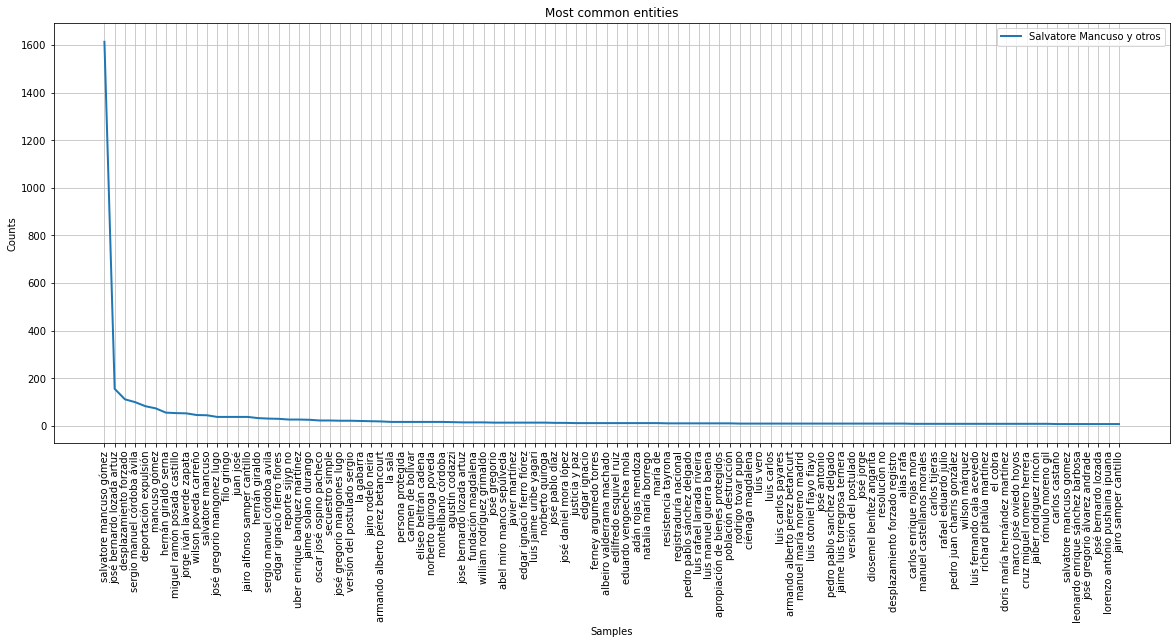

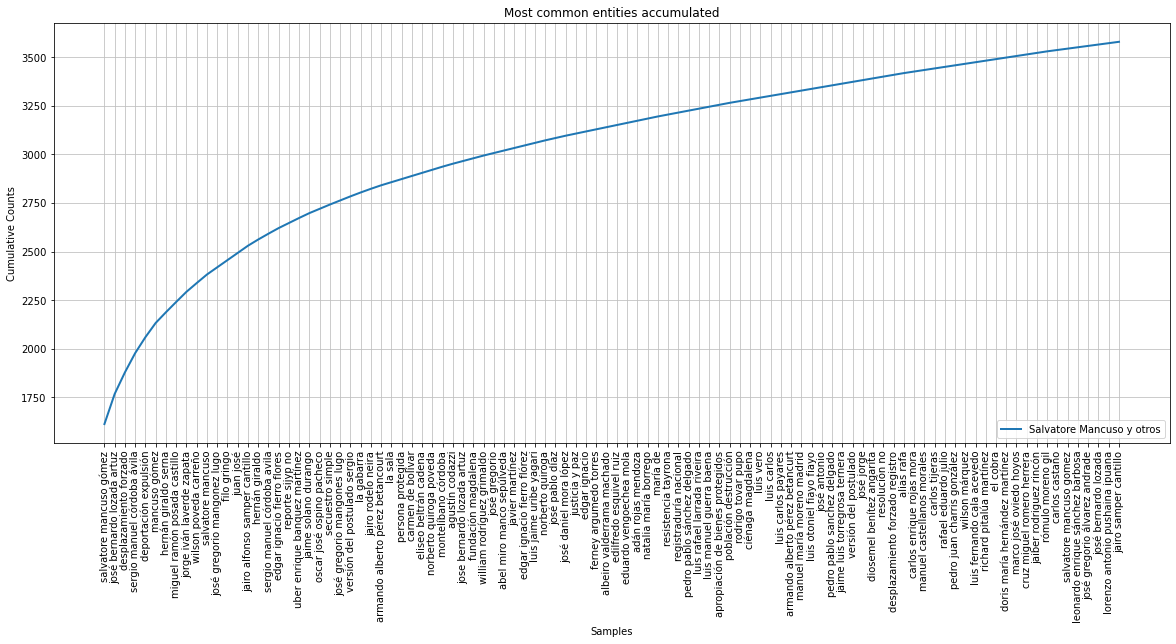

In [119]:
from collections import Counter
word_freq = Counter(label_ent)
common_words = word_freq.most_common(100)
# print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_ent_sent[title])

label_words = [word for (word, freq) in common_words]
# print(label_words)

# cfd.tabulate(conditions=label_sent, samples=label_words)
fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common entities", conditions=label_sent, samples=label_words)
plt.show()
fig.savefig('entities_1.png', bbox_inches = "tight")

fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common entities accumulated", conditions=label_sent, samples=label_words, cumulative=True)
plt.show()
fig.savefig('entities_2.png', bbox_inches = "tight")

with open('entities.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["item", "value"])      
    for item, value in word_freq.items():
        writer.writerow([item, value]) 


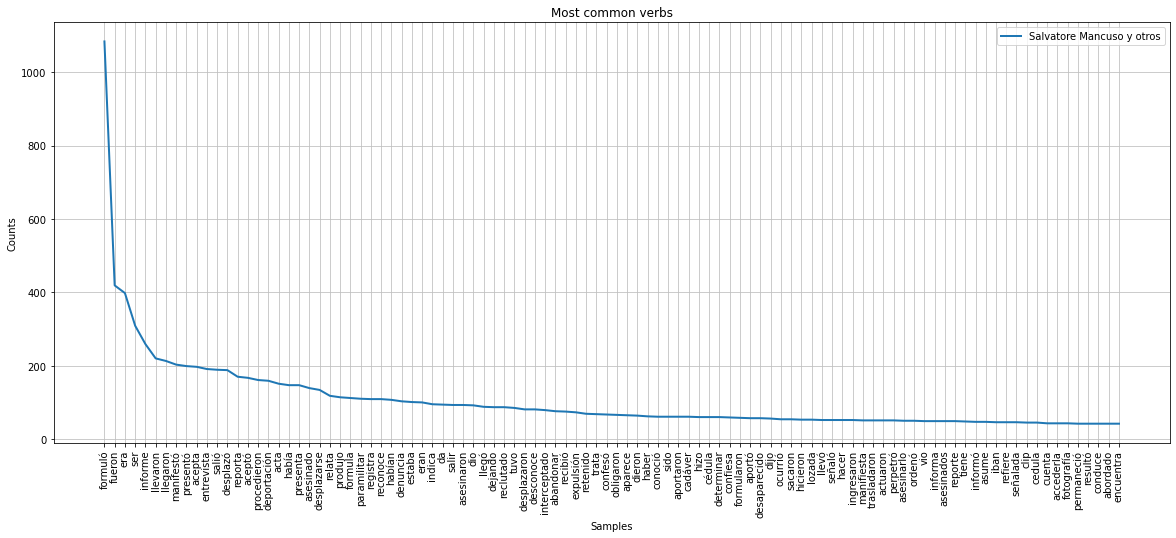

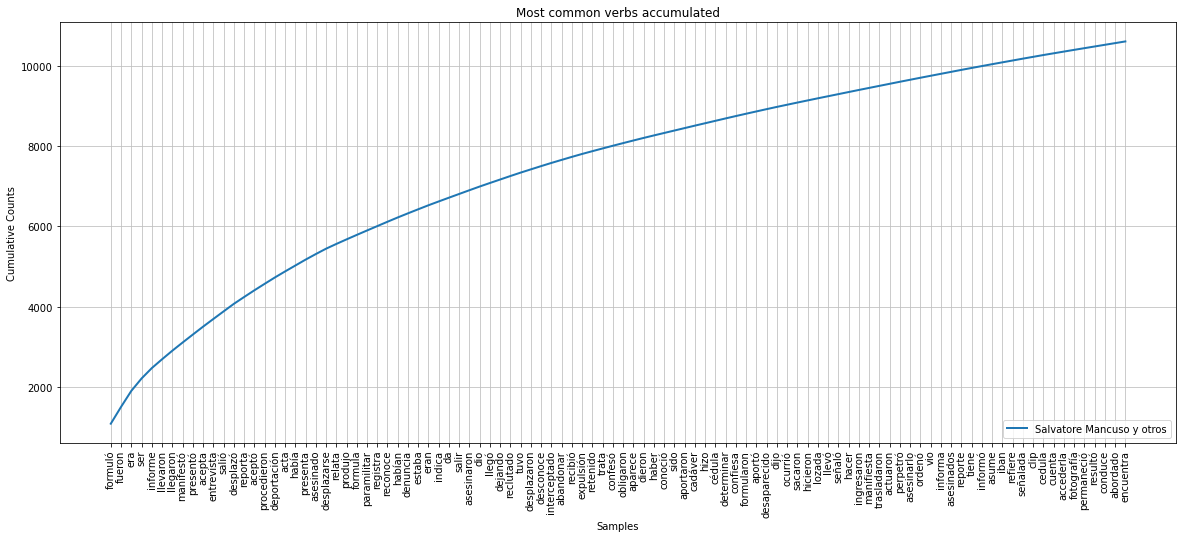

In [120]:
from collections import Counter
word_freq = Counter(label_verb)
common_words = word_freq.most_common(100)
# print(common_words)

cfd = nltk.ConditionalFreqDist(
           (title, word)
           for title in label_sent
           for word in label_verb_sent[title])

label_words = [word for (word, freq) in common_words]
# print(label_words)

fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common verbs", conditions=label_sent, samples=label_words)
plt.show()
fig.savefig('verbs_1.png', bbox_inches = "tight")

fig = plt.figure(figsize = (20, 8))
# plt.figure(figsize=(20, 8)) 
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
cfd.plot(title="Most common verbs accumulated", conditions=label_sent, samples=label_words, cumulative=True)
plt.show()
fig.savefig('verbs_2.png', bbox_inches = "tight")

with open('verbs.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["item", "value"])      
    for item, value in word_freq.items():
        writer.writerow([item, value]) 

152 152
934 934


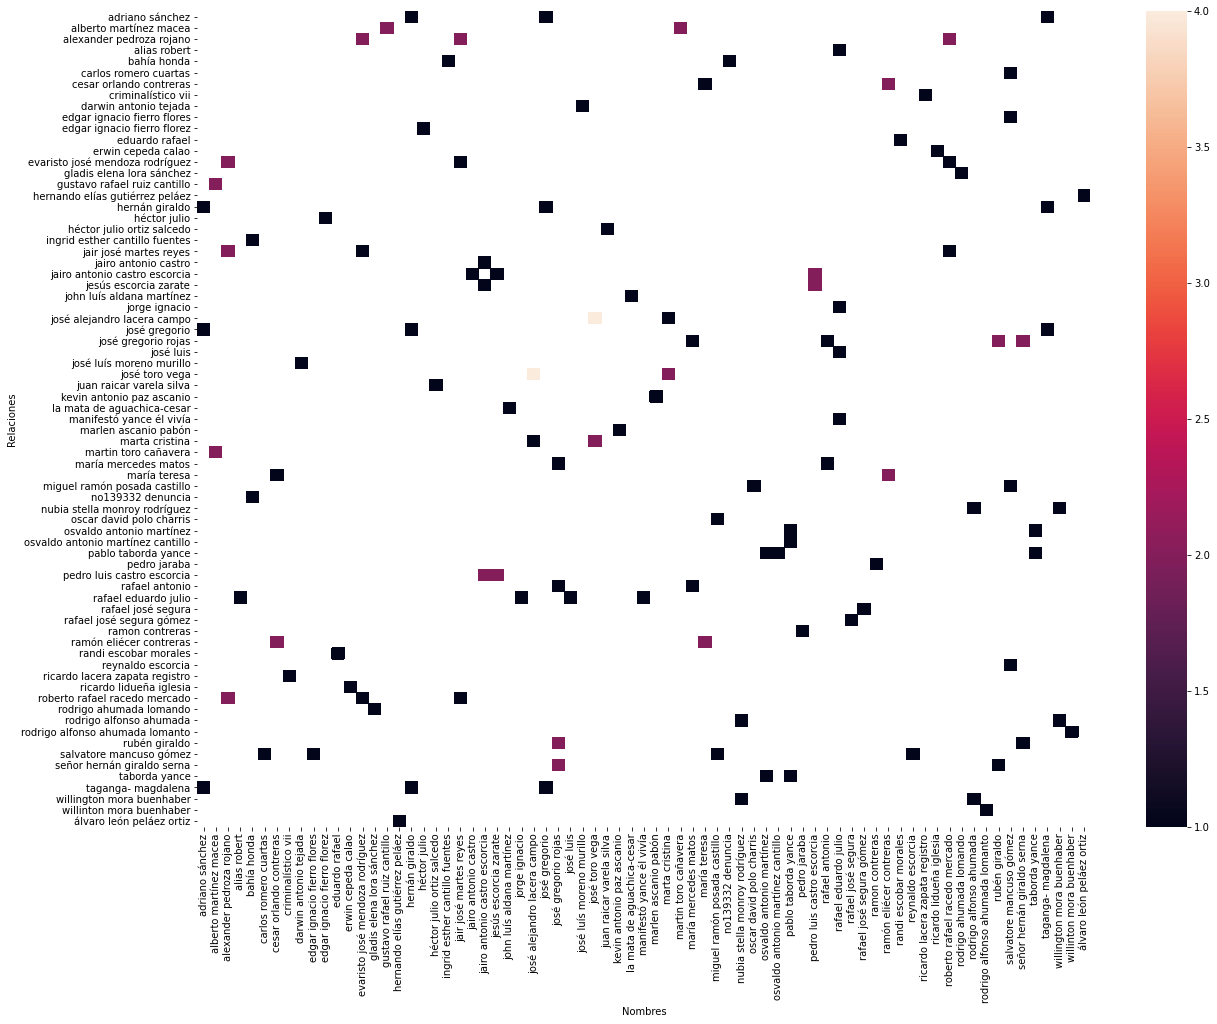

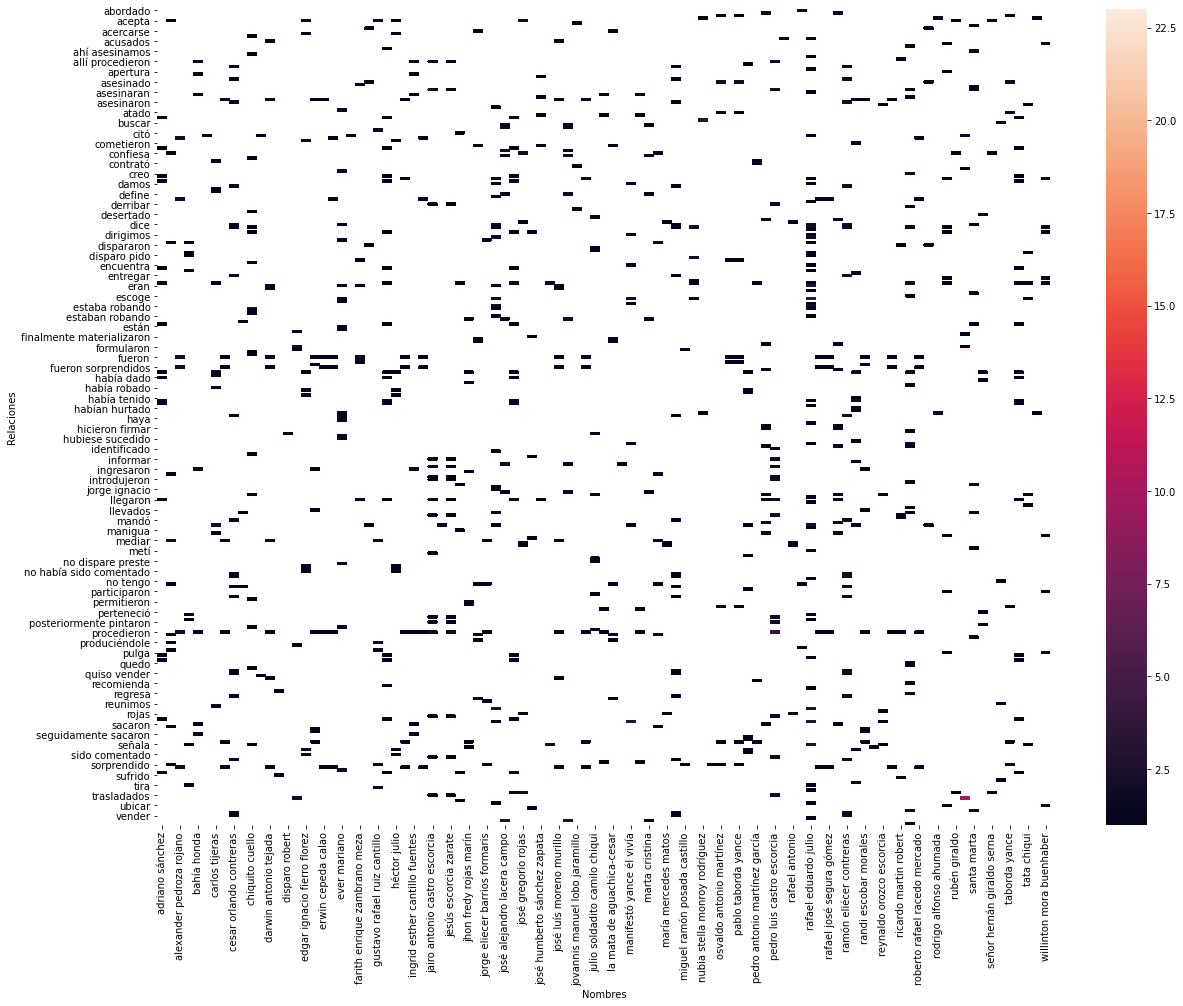

In [137]:
import pandas as pd
import seaborn as sns
import random

x = heat_ent_x # [random.randint(2013,2017) for n in range(2000)]
y = heat_ent_y # [random.randint(1,12) for n in range(2000)]
print(len(heat_ent_x), len(heat_ent_y))

df = pd.DataFrame([x, y]).T
df.columns=['Nombres','Relaciones']
df['count'] = 1
df.to_csv('entities_to_entities.csv', index=True)  
df2 = df.groupby(['Nombres','Relaciones'], as_index=False).count()
df_p = pd.pivot_table(df2,'count','Relaciones','Nombres')
df_p.to_csv('entities_to_entities.csv', index=True)  
plt.figure(figsize = (20,15))
sns_plot = sns.heatmap(df_p)
sns_plot.figure.savefig("entities_to_entities.png")
df_ent_ent = df
x = heat_verb_x # [random.randint(2013,2017) for n in range(2000)]
y = heat_verb_y # [random.randint(1,12) for n in range(2000)]
print(len(heat_verb_x), len(heat_verb_y))

df = pd.DataFrame([x, y]).T
df.columns=['Nombres','Relaciones']
df['count'] = 1
df2 = df.groupby(['Nombres','Relaciones'], as_index=False).count()
df_p = pd.pivot_table(df2,'count','Relaciones','Nombres')
df_p.to_csv('entities_to_verbs.csv', index=True)  
plt.figure(figsize = (20,15))
sns_plot = sns.heatmap(df_p)
sns_plot.figure.savefig("entities_to_verbs.png")
df_ent_verb = df

                          Nombres   Relaciones  count
0         salvatore mancuso gómez      formuló      1
1    miguel ramón posada castillo      formuló      1
2        oscar david polo charris  sorprendido      1
3    miguel ramón posada castillo  sorprendido      1
4         salvatore mancuso gómez   formularon      1
..                            ...          ...    ...
929      reynaldo orozco escorcia      sacamos      1
930      reynaldo orozco escorcia      asesine      1
931   edgar ignacio fierro flores       existe      1
932   edgar ignacio fierro flores   formularon      1
933       salvatore mancuso gómez      formuló      1

[934 rows x 3 columns]
99
320


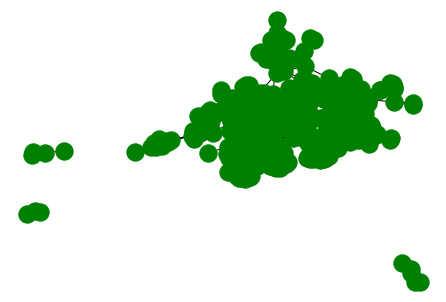

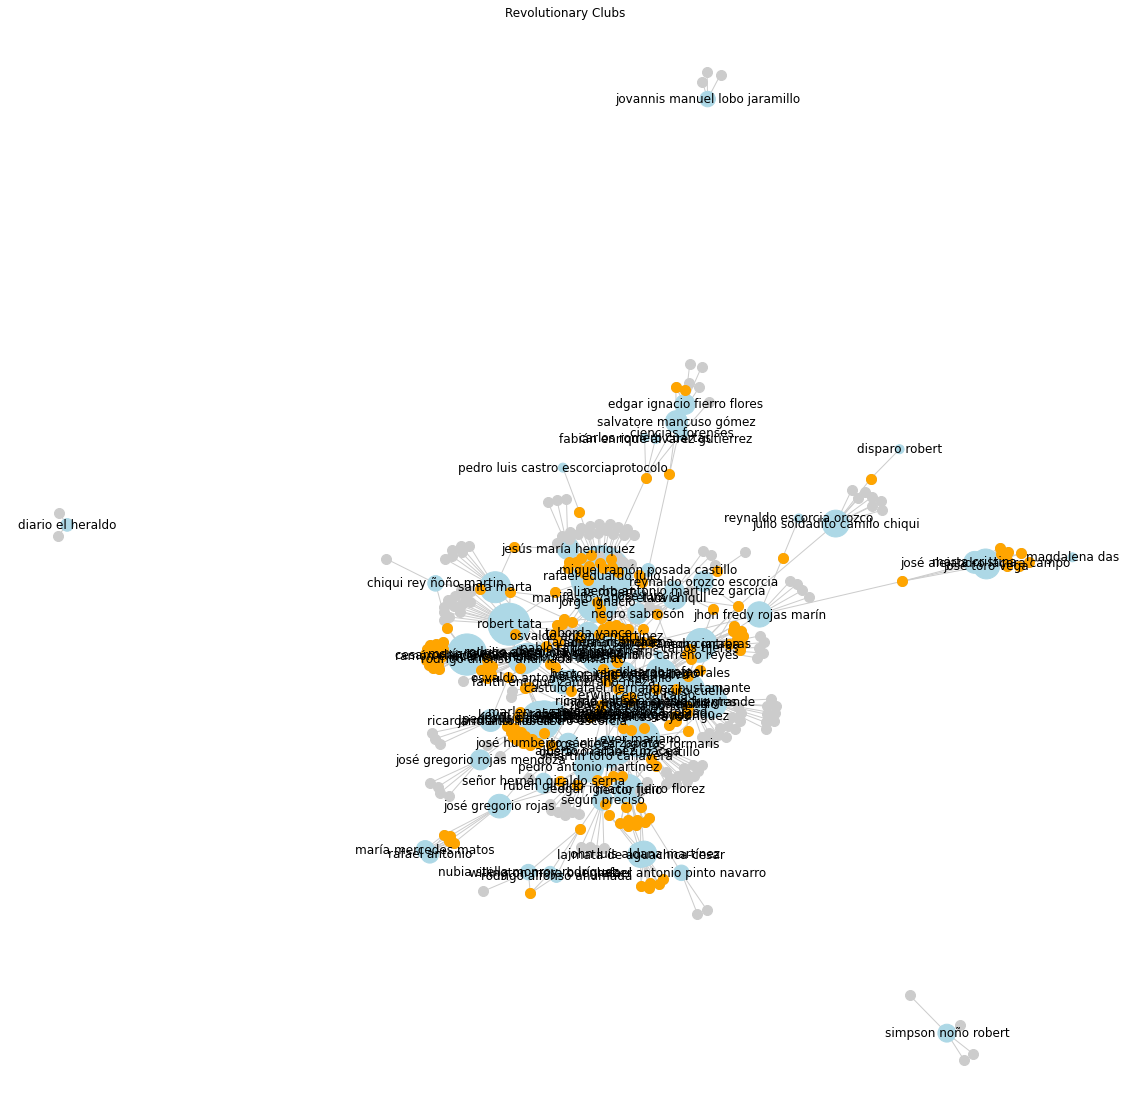

In [158]:
# import networkx as nx
# print(df_ent_verb) #from_pandas_adjacency from_pandas_edgelist
# df = df_ent_verb
# g = nx.from_pandas_edgelist(df, source='Nombres', target='Relaciones') 
# nx.draw(g, node_color='green')
# names = list(df['Nombres'].unique())
# print(len(names))
# relations = list(df['Relaciones'].unique())
# print(len(relations))
# dict(zip(names, names))
# [g.degree(name) for name in names]

# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 20))
# # 1. Create the graph
# g = nx.from_pandas_edgelist(df, source='Nombres', target='Relaciones') 
# # 2. Create a layout for our nodes 
# layout = nx.spring_layout(g,iterations=50)

# # 3. Draw the parts we want
# # Edges thin and grey
# # People small and grey
# # Clubs sized according to their number of connections
# # Clubs blue
# # Labels for clubs ONLY
# # People who are highly connected are a highlighted color

# # Go through every club name, ask the graph how many
# # connections it has. Multiply that by 80 to get the circle size
# names_size = [g.degree(name) * 80 for name in names]
# nx.draw_networkx_nodes(g, 
#                        layout, 
#                        nodelist=names, 
#                        node_size=names_size, # a LIST of sizes, based on g.degree
#                        node_color='lightblue')

# # Draw EVERYONE
# nx.draw_networkx_nodes(g, layout, nodelist=relations, node_color='#cccccc', node_size=100)

# # Draw POPULAR PEOPLE
# popular_people = [person for person in relations if g.degree(person) > 1]
# nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

# nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

# node_labels = dict(zip(names, names))
# nx.draw_networkx_labels(g, layout, labels=node_labels)

# # 4. Turn off the axis because I know you don't want it
# plt.axis('off')

# plt.title("Revolutionary Clubs")

# # 5. Tell matplotlib to show it
# plt.show()

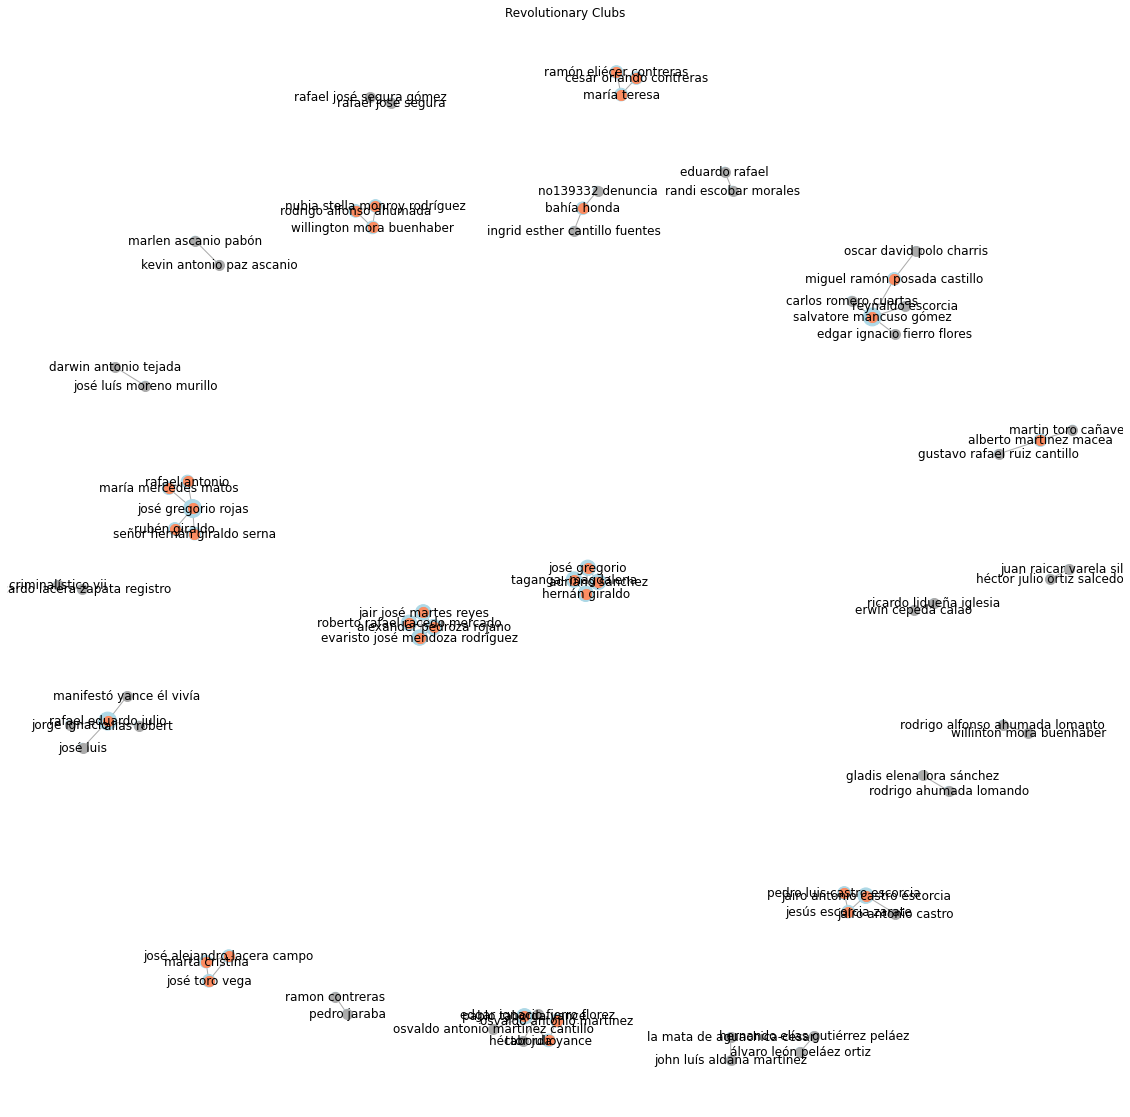

(None,)

In [170]:
import matplotlib.pyplot as plt

df = df_ent_ent
plt.figure(figsize=(20, 20))
# 1. Create the graph
g = nx.from_pandas_edgelist(df, source='Nombres', target='Relaciones') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

clubs = [node for node in g.nodes() if node in df['Nombres'].unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df['Nombres'].unique()]
nx.draw_networkx_nodes(g, layout, nodelist=clubs, node_size=size, node_color='lightblue')

people = [node for node in g.nodes() if node in df['Relaciones'].unique()]
nx.draw_networkx_nodes(g, layout, nodelist=people, node_size=100, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df['Relaciones'].unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=100, node_color='#fc8d62')

club_dict = dict(zip(clubs, clubs))
nx.draw_networkx_labels(g, layout, labels=club_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()
nx.write_gexf(g, "df_ent_ent.gexf"),

In [34]:
# label_sent = []
# label_chunk_sent = {}
# label_chunk = []
import numpy as np
import pandas as pd

my_array = np.array([[item, sent_name] for sent_name in label_ent_sent for item in label_ent_sent[sent_name]] , dtype=object)

data = pd.DataFrame(my_array, columns = ['label', 'sent'])

print(data)
print(type(data))
print(data.dtypes)

                                                label  \
0        tribunal superior de bogotá sala de justicia   
1                   postulados armando madriaga picón   
2                            jesús noraldo basto león   
3                                            fiscalía   
4                              armando madriaga picon   
...                                               ...   
1227                       robinson santiago castilla   
1228                                               no   
1229                                      sijin desan   
1230                                           no 865   
1231  estación de polícia de la localidad de engativa   

                                              sent  
0     Armando Madriaga Picón y Jesús Noraldo Basto  
1     Armando Madriaga Picón y Jesús Noraldo Basto  
2     Armando Madriaga Picón y Jesús Noraldo Basto  
3     Armando Madriaga Picón y Jesús Noraldo Basto  
4     Armando Madriaga Picón y Jesús Noraldo Basto

In [35]:
print(data.nunique())
print(data['label'].value_counts().sort_index())
values = data[['label', 'sent']]

label    508
sent       1
dtype: int64
1 n a no 29h-26 del municipio de aguachica cesar    1
12 de agosto 1949                                   1
306 sala de justicia y paz                          1
332 sala de justicia y paz                          1
339 sala de justicia y paz                          1
                                                   ..
wilson solis sierra                                 1
yamaha de placa gkq-77                              1
yesid delgado                                       3
él                                                  1
ídem                                                3
Name: label, Length: 508, dtype: int64


In [36]:
sorted_values = values['label'].sort_values().unique()

from dirty_cat import SimilarityEncoder

similarity_encoder = SimilarityEncoder(similarity='ngram')
transformed_values = similarity_encoder.fit_transform(
    sorted_values.reshape(-1, 1))

In [37]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed', n_init=10, random_state=42)
two_dim_data = mds.fit_transform(
    1 - transformed_values)  # transformed values lie
# in the 0-1 range, so 1-transformed_value yields a positive dissimilarity matrix
print(two_dim_data.shape)
print(sorted_values.shape)

(508, 2)
(508,)


In [38]:
import numpy as np

n_points = 50
np.random.seed(42)
from sklearn.neighbors import NearestNeighbors

random_points = np.random.choice(len(similarity_encoder.categories_[0]),n_points, replace=False)
nn = NearestNeighbors(n_neighbors=2).fit(transformed_values)
_, indices_ = nn.kneighbors(transformed_values[random_points])
indices = np.unique(indices_.squeeze())

Text(0.5, 1.0, 'multi-dimensional-scaling representation')

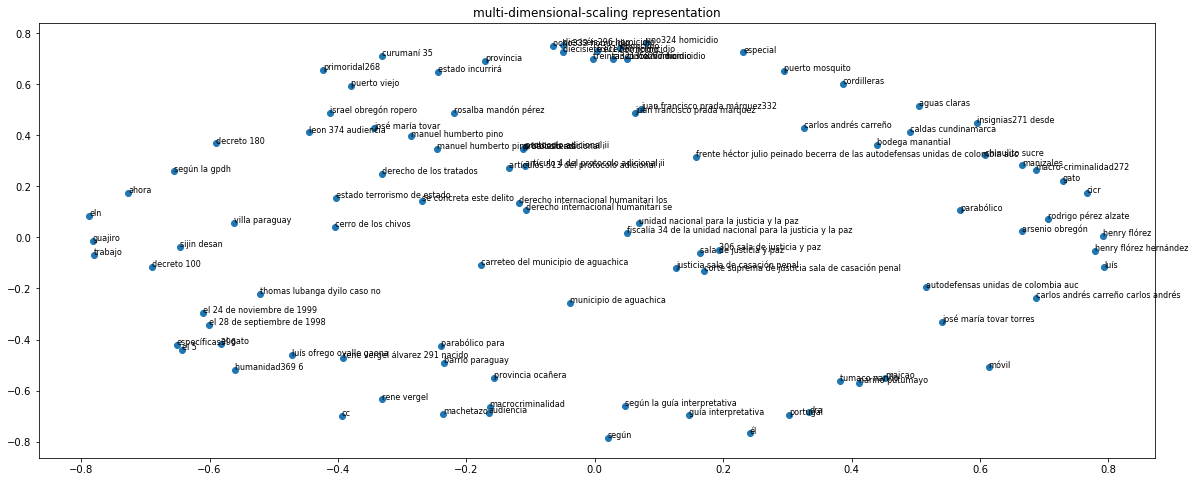

In [40]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 8)) 
f, ax = plt.subplots(figsize=(20, 8))
ax.scatter(x=two_dim_data[indices, 0], y=two_dim_data[indices, 1])
# adding the legend
for x in indices:
    ax.text(x=two_dim_data[x, 0], y=two_dim_data[x, 1], s=sorted_values[x],
            fontsize=8)
ax.set_title('multi-dimensional-scaling representation')

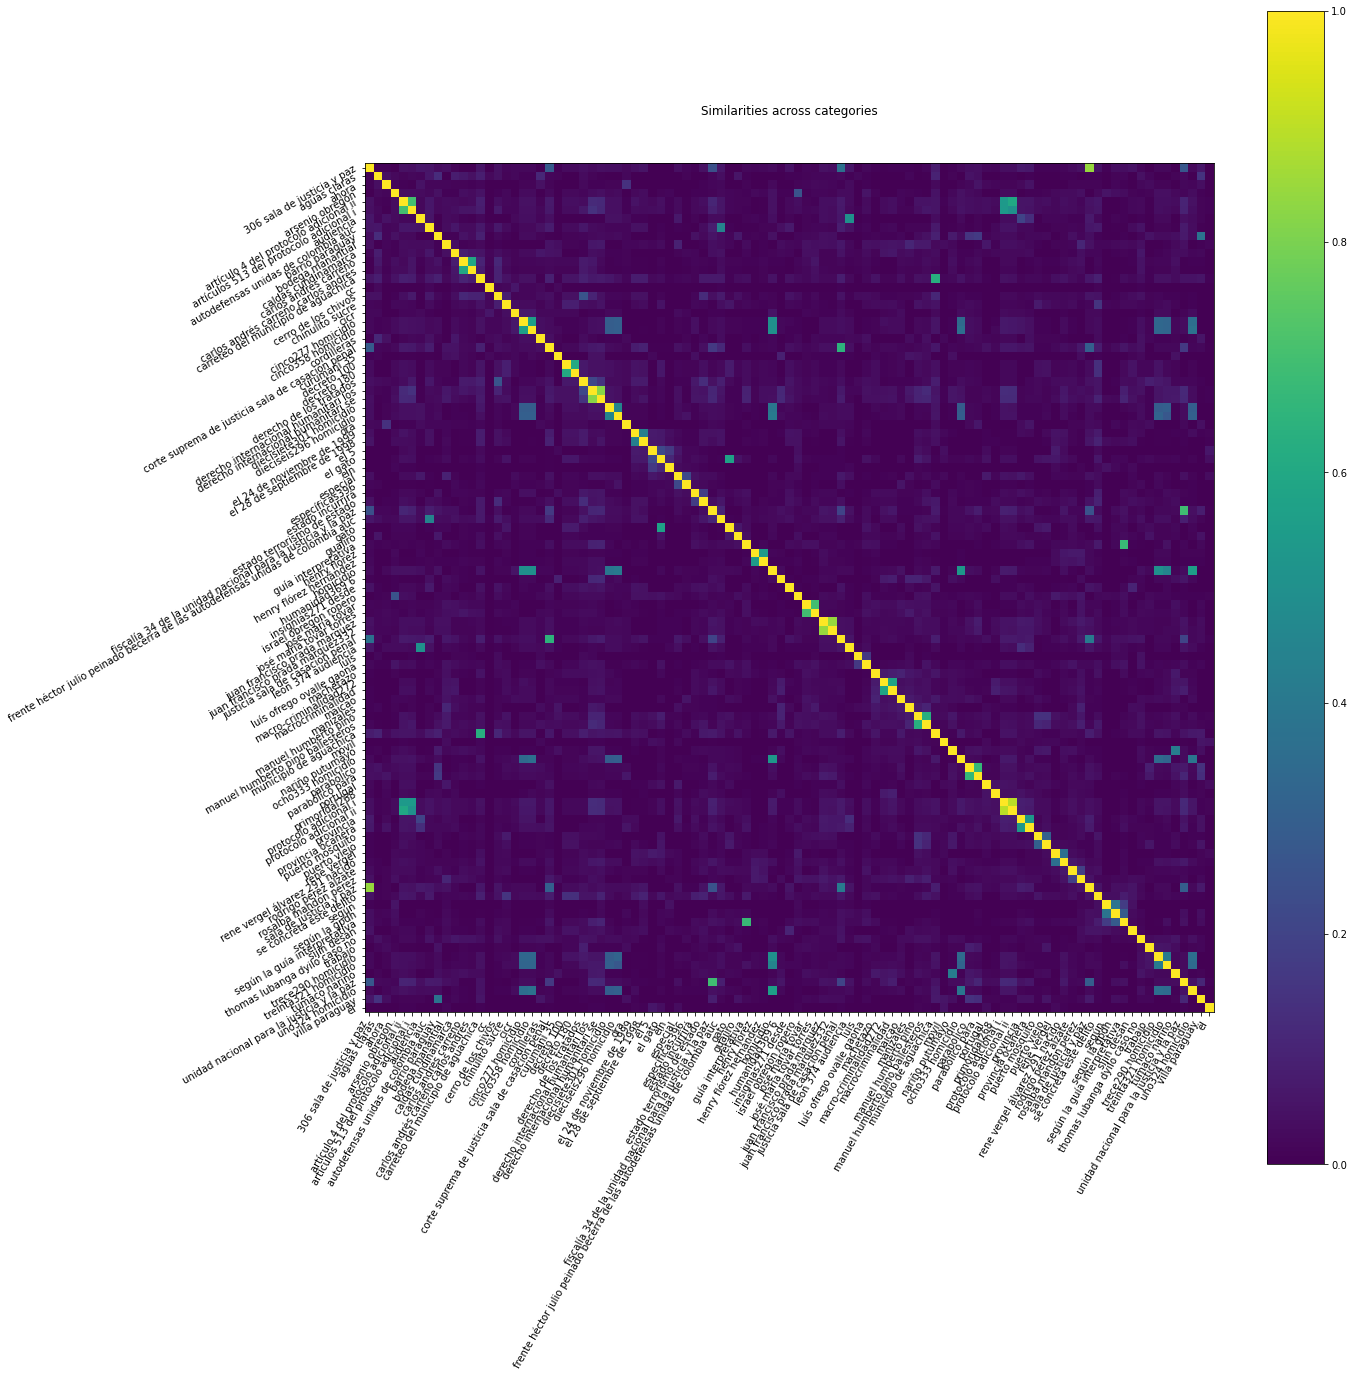

In [42]:
f2, ax2 = plt.subplots(figsize=(20, 20))
cax2 = ax2.matshow(transformed_values[indices, :][:, indices])
ax2.set_yticks(np.arange(len(indices)))
ax2.set_xticks(np.arange(len(indices)))
ax2.set_yticklabels(sorted_values[indices], rotation='30')
ax2.set_xticklabels(sorted_values[indices], rotation='60', ha='right')
ax2.xaxis.tick_bottom()
ax2.set_title('Similarities across categories')
f2.colorbar(cax2)
f2.tight_layout()